In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats
from scipy import integrate
import math

%matplotlib inline

$\textbf{FIGURE 4}$: Plotting the fraction of ribosome-bound ternary complexes and binding affinity as a function of isotropic attraction strength (colors) and cytoplasmic volume fraction / growth rate (x-axis).

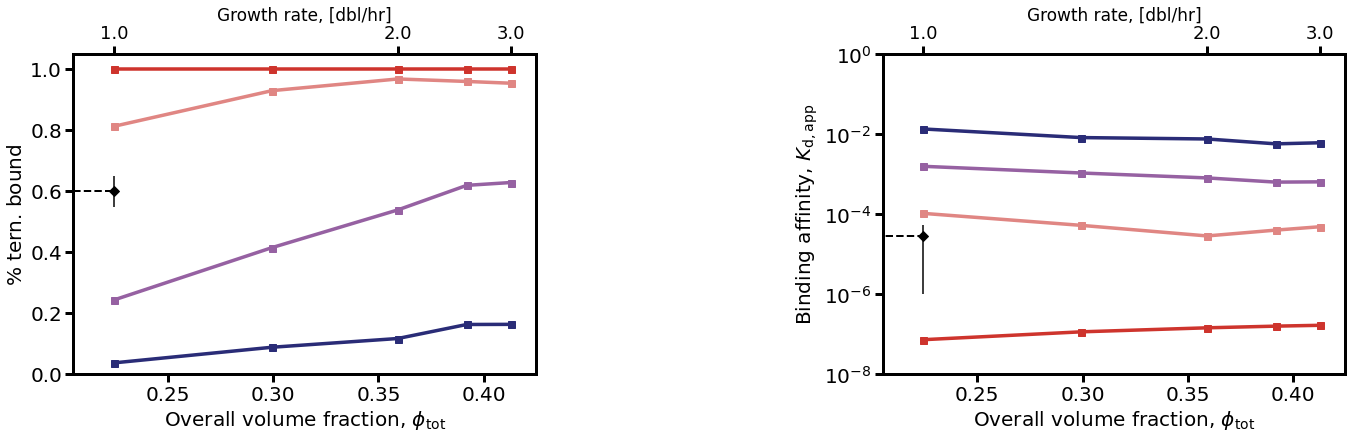

In [27]:
fig, ((ax1,ax2)) = plt.subplots(1,2)

sigma = (13 + 5.8773)/0.72605 #nm, contact distance
sigma_scale = 5.8773*2
attr_list = [0, 3, 6, 16] # attraction strengths
gr = [1,1.5, 2,2.5, 3] # growth rates
phi_tot = [0.224305227,0.299376633587747,0.359217677,0.391970710905258,0.413017898] # volume fractions
n_rib = [157,181,175,160,145] # number of ribosomes
n_TC = [840,840,840,840,840] # number of ternary complexes
V_totL = [1.5817E-17,1.19135E-17,9.08722E-18,7.42131E-18,6.27579E-18] # total voxel volume
NA = 6.022e23 # Avogadro's number

colorsall = ['#2A2C77', '#9661A2', '#E08683', '#CE342D']
labelsall=['$\epsilon_{attr} = 0 kT$','$\epsilon_{attr} = 3 kT$','$\epsilon_{attr} = 6 kT$','$\epsilon_{attr} = 16 kT$']

##### Percent of ternary complexes bound to ribosomes

PercBound_TC_alleps_allphi = np.loadtxt('../Data/Fig4_5DE_S6_S7_S10_S11__FractionBound_Nc/PercBound_TC_alleps_allphi.txt')
for i in range(0,len(attr_list)):
    PercBound_TC = PercBound_TC_alleps_allphi[:,i]
    ax1.plot(phi_tot, PercBound_TC, color=colorsall[i], zorder=10, linewidth=3.5, markersize=7, marker='s', label=labelsall[i])

#### Calculating K_d

n = 32 # maximum number of TCs that can bind to a ribosome, see Methods
for i in range(0,len(attr_list)):
    temp1 = [0,0,0,0,0]
    for j in range(0,len(phi_tot)):
        perc = PercBound_TC_alleps_allphi[j][i]
        temp1[j] = (n*n_rib[j]/perc - n_TC[j])*(1-perc)/(NA*V_totL[j]) # see Eq. 11 in Methods
    ax2.plot(phi_tot, temp1, color=colorsall[i], linewidth=3.5, markersize=7, marker='s', label=labelsall[i])
      
####

for ax in fig.get_axes():
    t = ax.yaxis.get_offset_text()
    t.set_size(15)
    t = ax.xaxis.get_offset_text()
    t.set_size(15)
    ax.set_xlim(0.205,0.425)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Overall volume fraction, $\phi_\mathrm{tot}$',size=20)
    ax.tick_params(axis='both', labelsize=20,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    axa = ax.twiny()
    axa.set_xlim(ax.get_xlim())
    new_tick_locations = np.array([0.224305227,0.359217677,0.413017898])
    axa.set_xticks(new_tick_locations)
    axa.set_xticklabels([1.0, 2.0, 3.0])
    axa.set_xlabel('Growth rate, [dbl/hr]',size=17)
    axa.tick_params(labelsize=18,width=3,length=8)
    
ax1.plot([0,0.224305227],[0.6,0.6], color='k', linestyle='dashed', linewidth=2, zorder=20)
ax1.errorbar([0.224305227],[0.6], [0.05], color='k', marker='D',markersize=7, zorder=20)
ax1.set_ylim(0,1.05)
ax1.set_ylabel('$\%$ tern. bound',size=20)
        
ax2.plot([0,0.224305227],[2.8e-5,2.8e-5], color='k', linestyle='dashed', linewidth=2, zorder=20)
ax2.errorbar([0.224305227],[2.8e-5],[[2.7e-5],[2.7e-5]], color='k', marker='D',markersize=7, zorder=20)
ax2.set_ylabel('Binding affinity, $K_\mathrm{d,app}$',size=20)
ax2.set_ylim(1e-8,1e0)
ax2.set_yscale('log')
fig.tight_layout(pad=0)

fig.set_size_inches(22,7)
plt.savefig('./images/Fig4.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE S10}$: Calculating and plotting the $\textit{in vivo}$ fraction of ribosome-bound ternary complexes, extrapolated to higher growth rates using of whole-cell abundances and purely-repulsive simulations.

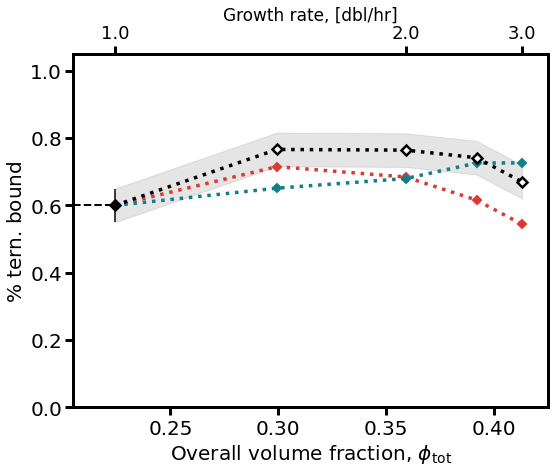

In [16]:
fig, ax = plt.subplots()

# simulation data from purely-repulsive hard sphere simulations
PercBound_TC_eps0 = PercBound_TC_alleps_allphi[:,0]
norm = PercBound_TC_eps0[0]
PercBound_TC_eps0_norm = [a/norm for a in PercBound_TC_eps0]
add = [a-norm for a in PercBound_TC_eps0]

# fraction bound,assuming 4:1 ternary complex to ribosome binding, given relative abundances in table S1
onetoone_bind = [0.747165533, 0.862290862, 0.831527094, 0.762974853, 0.691156463] 
add0 = [a-0.747165533 for a in onetoone_bind] # change relative to 1 dbl/hr

plusstoich = []
pluscrowd = []
final = []
for i in range(0,5):
    plusstoich.append(0.6 + add0[i]) # expected change in f based on entropic interactions alone
    pluscrowd.append(0.6 + add[i]) # expected change in f based on change in relative stoichiometry alone
    mid = 0.6 + add0[i] + add[i] # total change
    final.append(mid)

ax.plot(phi_tot,plusstoich, markeredgecolor='#DB3A34',marker='D', markeredgewidth=2, markersize=5, color='#DB3A34', linestyle='dotted', linewidth=3.5)
ax.plot(phi_tot,pluscrowd, markeredgecolor='#117E89',marker='D', markeredgewidth=2, markersize=5, color='#117E89', linestyle='dotted', linewidth=3.5)
ax.plot(phi_tot,final, markerfacecolor='w', markeredgecolor='k',marker='D', markeredgewidth=2.5, markersize=7, color='k', linestyle='dotted', linewidth=3.5)
ax.fill_between(phi_tot, [a - 0.05 for a in final], [a + 0.05 for a in final], color='gray', alpha=0.2)

for ax in fig.get_axes():
    t = ax.yaxis.get_offset_text()
    t.set_size(15)
    t = ax.xaxis.get_offset_text()
    t.set_size(15)
    ax.set_xlim(0.205,0.425)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Overall volume fraction, $\phi_\mathrm{tot}$',size=20)
    ax.tick_params(axis='both', labelsize=20,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    axa = ax.twiny()
    axa.set_xlim(ax.get_xlim())
    new_tick_locations = np.array([0.224305227,0.359217677,0.413017898])
    axa.set_xticks(new_tick_locations)
    axa.set_xticklabels([1.0, 2.0, 3.0])
    axa.set_xlabel('Growth rate, [dbl/hr]',size=17)
    axa.tick_params(labelsize=18,width=3,length=8)
    
ax.plot([0,0.224305227],[0.6,0.6], color='k', linestyle='dashed', linewidth=2, zorder=20)
ax.errorbar([0.224305227],[0.6], [0.05], color='k', marker='D',markersize=7, zorder=20)
ax.set_ylim(0,1.05)
ax.set_ylabel('$\%$ tern. bound',size=20)
    
fig.set_size_inches(8.5,6.5)
plt.savefig('./images/FigS10.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE 5D-E}$: Plotting the $\textit{in vivo}$ fraction of ribosome-bound ternary complexes and binding affinity, for hard sphere (solid blue lines) and isotropic (solid red lines) and limited-valency (dashed red lines) $16\, k_\mathrm{B}T$ systems.

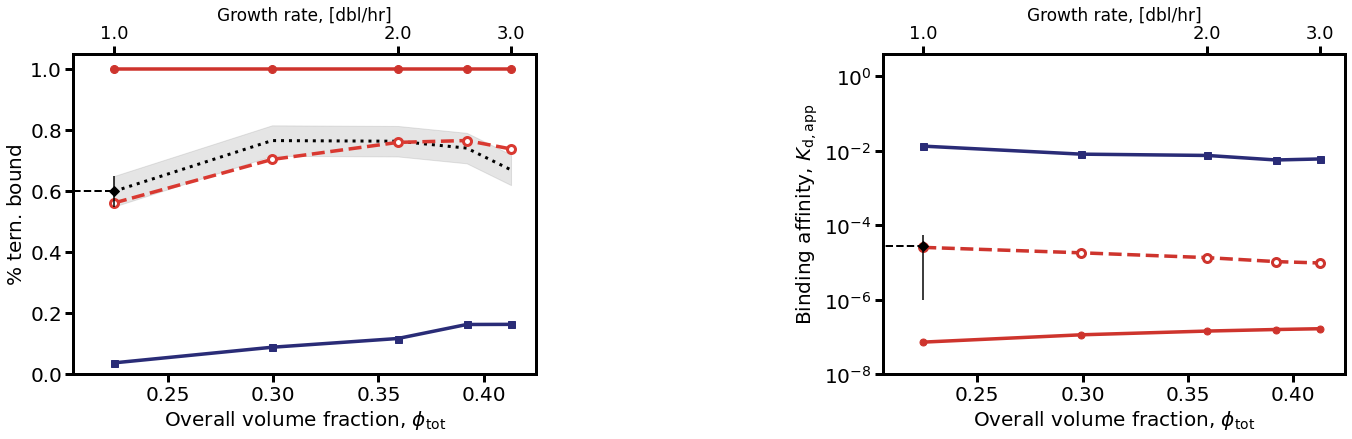

In [17]:
fig, ((ax1,ax2)) = plt.subplots(1,2)


##### 

# isotropic percent bound, 0 and 16kT
ax1.plot(phi_tot, PercBound_TC_alleps_allphi[:,0], color='#2A2C77', zorder=10, linewidth=3.5, markersize=7, marker='s', label=r'Isotropic, $\varepsilon_{attr}=0kT$')
ax1.plot(phi_tot, PercBound_TC_alleps_allphi[:,3], color='#CE342D', zorder=10, linewidth=3.5, markersize=8, marker='o', label=r'Isotropic, $\varepsilon_{attr}=16kT$')

# limited-valency, 16kT
percbound_L7L12_limval = [0.5617205300000001, 0.704386525, 0.76036125, 0.7664794, 0.738820865]
percbound_L7L12_limval_std = [0.0032, 0.0027, 0.0020, 0.0062, 0.0026]
ax1.errorbar(phi_tot, percbound_L7L12_limval, yerr=percbound_L7L12_limval_std, color='#D93931', zorder=10, linewidth=3.5, linestyle='dashed', markersize=8, marker='o',markerfacecolor='w', markeredgecolor='#D93931', markeredgewidth=3)

# plotting extrapolated in vivo data
ax1.plot(phi_tot,final, markerfacecolor='w', markeredgecolor='k',marker='D', markeredgewidth=2.5, markersize=0, color='k', linestyle='dotted', linewidth=3)
ax1.fill_between(phi_tot, [a - 0.05 for a in final], [a + 0.05 for a in final], color='gray', alpha=0.2)

####    calculating Kd, see Eq. 11

# isotropic
n = 32
symbols = ['s', 'v', '^', 'o']
for i in range(0,4):
    temp1 = [0,0,0,0,0]
    for j in range(0,len(phi_tot)):
        perc = PercBound_TC_alleps_allphi[j][i]
        temp1[j] = (n*n_rib[j]/perc - n_TC[j])*(1-perc)/(NA*V_totL[j])
    if (i==0 or i==3):
        ax2.plot(phi_tot, temp1, color=colorsall[i], linewidth=3.5, markersize=7, marker=symbols[i])

# limited valency
n = 5
labelsall=['$\epsilon_{attr} = 16 kT$'] 
colorlist = ['#CE342D']
temp1 = [0,0,0,0,0]
temp2 = [0,0,0,0,0]
for j in range(0,5):
    perc = percbound_L7L12_limval[j]
    temp1[j] = (n*n_rib[j]/perc - n_TC[j])*(1-perc)/(NA*V_totL[j])
ax2.plot(phi_tot, temp1, color='#CE342D', zorder=10, linewidth=3.5, linestyle='dashed', markersize=8, marker='o',markerfacecolor='w', markeredgecolor='#CE342D', markeredgewidth=3)

######

for ax in fig.get_axes():
    t = ax.yaxis.get_offset_text()
    t.set_size(15)
    t = ax.xaxis.get_offset_text()
    t.set_size(15)
    ax.set_xlim(0.205,0.425)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Overall volume fraction, $\phi_\mathrm{tot}$',size=20)
    ax.tick_params(axis='both', labelsize=20,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    
    axa = ax.twiny()
    axa.set_xlim(ax.get_xlim())
    new_tick_locations = np.array([0.224305227,0.359217677,0.413017898])
    axa.set_xticks(new_tick_locations)
    axa.set_xticklabels([1.0, 2.0, 3.0])
    axa.set_xlabel('Growth rate, [dbl/hr]',size=17)
    axa.tick_params(labelsize=18,width=3,length=8)
    
ax1.plot([0,0.224305227],[0.6,0.6], color='k', linestyle='dashed', linewidth=2, zorder=20)
ax1.errorbar([0.224305227],[0.6], [0.05], color='k', marker='D',markersize=7, zorder=20)
ax1.set_ylim(0,1.05)
ax1.set_ylabel('$\%$ tern. bound',size=20)
    
ax2.plot([0,0.224305227],[2.8e-5,2.8e-5], color='k', linestyle='dashed', linewidth=2, zorder=200)
ax2.errorbar([0.224305227],[2.8e-5],[[2.7e-5],[2.7e-5]], color='k', marker='D',markersize=7, zorder=200)
ax2.set_ylabel('Binding affinity, $K_\mathrm{d,app}$',size=20)
ax2.set_ylim(1e-8,4e0)
ax2.set_yscale('log')
fig.tight_layout(pad=0)

fig.set_size_inches(22,7)
plt.savefig('./images/Fig5DE.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE S7}$: Plotting the $\textit{in vivo}$ binding affinity between ternary complexes and ribosomes, for isotropic systems (colors) and the calculated affinity using the measured $\textit{in vivo}$ ribosome-bound ternary complex fraction in Eq. 11.

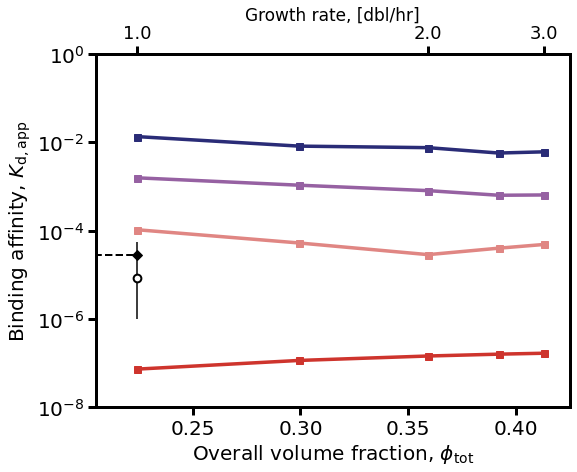

In [21]:
fig, ax = plt.subplots()

####

# isotropic attractive simulations
n = 32
for i in range(0,4):
    temp1 = [0,0,0,0,0]
    for j in range(0,len(phi_tot)):
        perc = PercBound_TC_alleps_allphi[j][i]
        temp1[j] = (n*n_rib[j]/perc - n_TC[j])*(1-perc)/(NA*V_totL[j])
    ax.plot(phi_tot, temp1, color=colorsall[i], linewidth=3.5, markersize=7, marker='s')

# given measured %bound, calculate Kd using Eq. 11 and our measured abundances of translation molecules
n = 4
perc = 0.6
Kd_invivo = (n*n_rib[0]/perc - n_TC[0])*(1-perc)/(NA*V_totL[0])
ax.scatter(phi_tot[0], Kd_invivo, c='w', edgecolors='k', linewidth=2, s=60, marker='o',zorder=300)

####

for ax in fig.get_axes():
    t = ax.yaxis.get_offset_text()
    t.set_size(15)
    t = ax.xaxis.get_offset_text()
    t.set_size(15)
    ax.set_xlim(0.205,0.425)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Overall volume fraction, $\phi_\mathrm{tot}$',size=20)
    ax.tick_params(axis='both', labelsize=20,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    
    axa = ax.twiny()
    axa.set_xlim(ax.get_xlim())
    #secax_x = ax.secondary_xaxis('top')
    new_tick_locations = np.array([0.224305227,0.359217677,0.413017898])
    axa.set_xticks(new_tick_locations)
    axa.set_xticklabels([1.0, 2.0, 3.0])
    axa.set_xlabel('Growth rate, [dbl/hr]',size=17)
    axa.tick_params(labelsize=18,width=3,length=8)

ax.plot([0,0.224305227],[2.8e-5,2.8e-5], color='k', linestyle='dashed', linewidth=2, zorder=20)
ax.errorbar([0.224305227],[2.8e-5],[[2.7e-5],[2.7e-5]], color='k', marker='D',markersize=7, zorder=20)
ax.set_ylabel('Binding affinity, $K_\mathrm{d,app}$',size=20)
ax.set_ylim(1e-8,1e0)
ax.set_yscale('log')

fig.set_size_inches(8.5,6.5)
plt.savefig('./images/Kd_test.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE S6}$: Plotting the coordination number distributions for isotropic translation voxels at three growth rates (colors) and attraction strengths $\varepsilon_\mathrm{t,r} = 0$, $3$, $6$, and $16\, k_\mathrm{B}T$ (left to right).

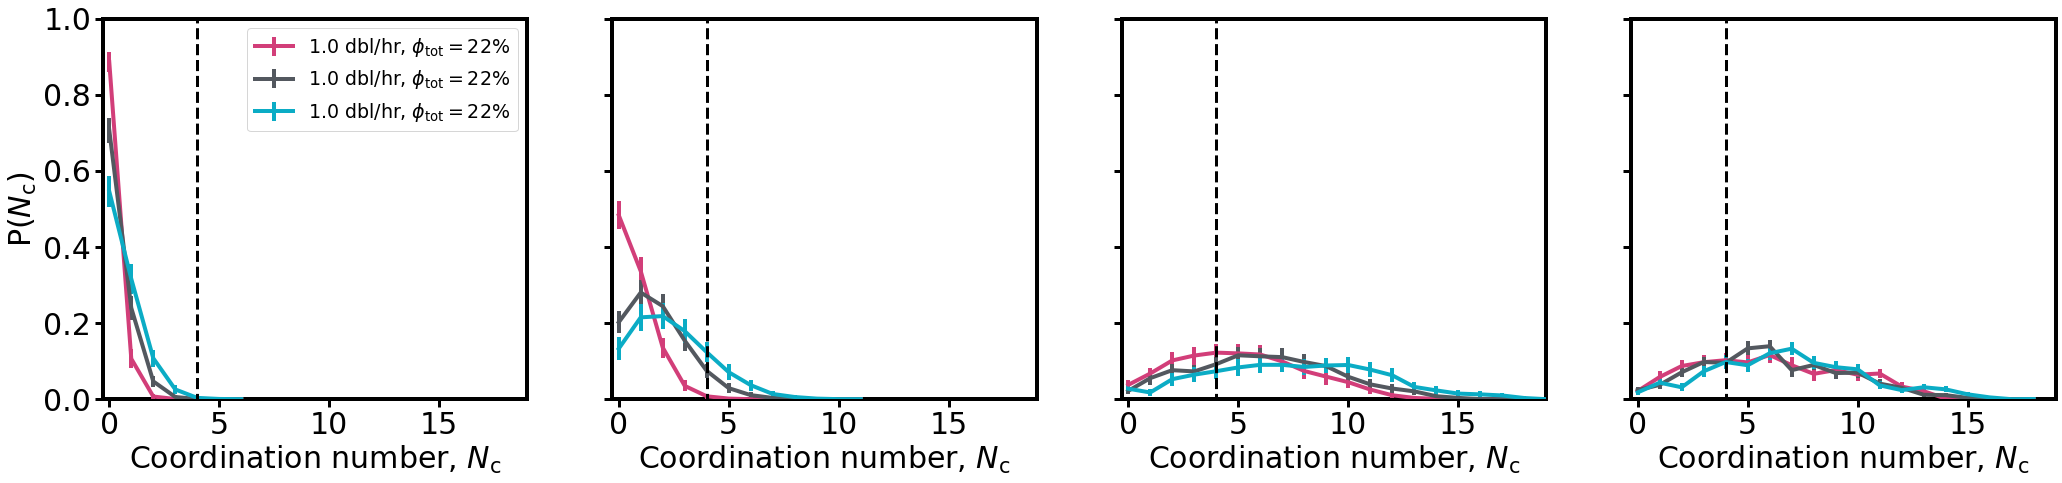

In [22]:
fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(1,4)

Nc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
finval = [7,12,20,19]
colors_all = ['#d23e79', 'k', '#53585F', 'k', '#0bacc5']
axes_all = [ax1,ax2,ax3,ax4]

for i in range(0,len(attr_list)):
    PNc_all = np.loadtxt('../Data/Fig4_5DE_S6_S7_S10_S11__FractionBound_Nc/tri_alleps_e{}_nc_rib.txt'.format(attr_list[i]))
    stdev_PNc_all = np.loadtxt('../Data/Fig4_5DE_S6_S7_S10_S11__FractionBound_Nc/tri_alleps_e{}_nc_rib_stdev.txt'.format(attr_list[i]))
    axes_curr = axes_all[i]
    for j in range(0,len(phi_tot)):
        PNc = PNc_all[j,:]
        stdev_PNc = stdev_PNc_all[j,:]
        if j in (0, 2, 4):
            axes_curr.errorbar(Nc[0:finval[i]], PNc, yerr=stdev_PNc, color=colors_all[j], zorder=9, linewidth=4, label='1.0 dbl/hr, $\phi_\mathrm{tot} = 22\%$')
    axes_curr.plot([4,4],[-100,100], color='k', linestyle='dashed', linewidth=3, zorder=100)

#####

t = ax1.yaxis.get_offset_text()
t.set_size(15)
t = ax1.xaxis.get_offset_text()
t.set_size(15)
ax1.legend(prop={'size': 19},loc='upper right')
for ax in fig.get_axes():
    ax.set_xlim(-0.3,19)
    ax.set_ylim(0,1)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.set_xlabel('Coordination number, $N_\mathrm{c}$',size=30)
    ax.set_ylabel('P($N_\mathrm{c}$)',size=30)
    ax.tick_params(axis='both', labelsize=30,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)

for ax in fig.get_axes():
    ax.label_outer()
        
fig.set_size_inches(35,7)
plt.savefig('./images/FigS6.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE S11}$: Plotting the coordination number distributions for isotropic (solid lines) and limited-valency (dashed lines) $\varepsilon_\mathrm{t,r} = 16\, k_\mathrm{B}T$ translation voxels at five growth rates (left to right).

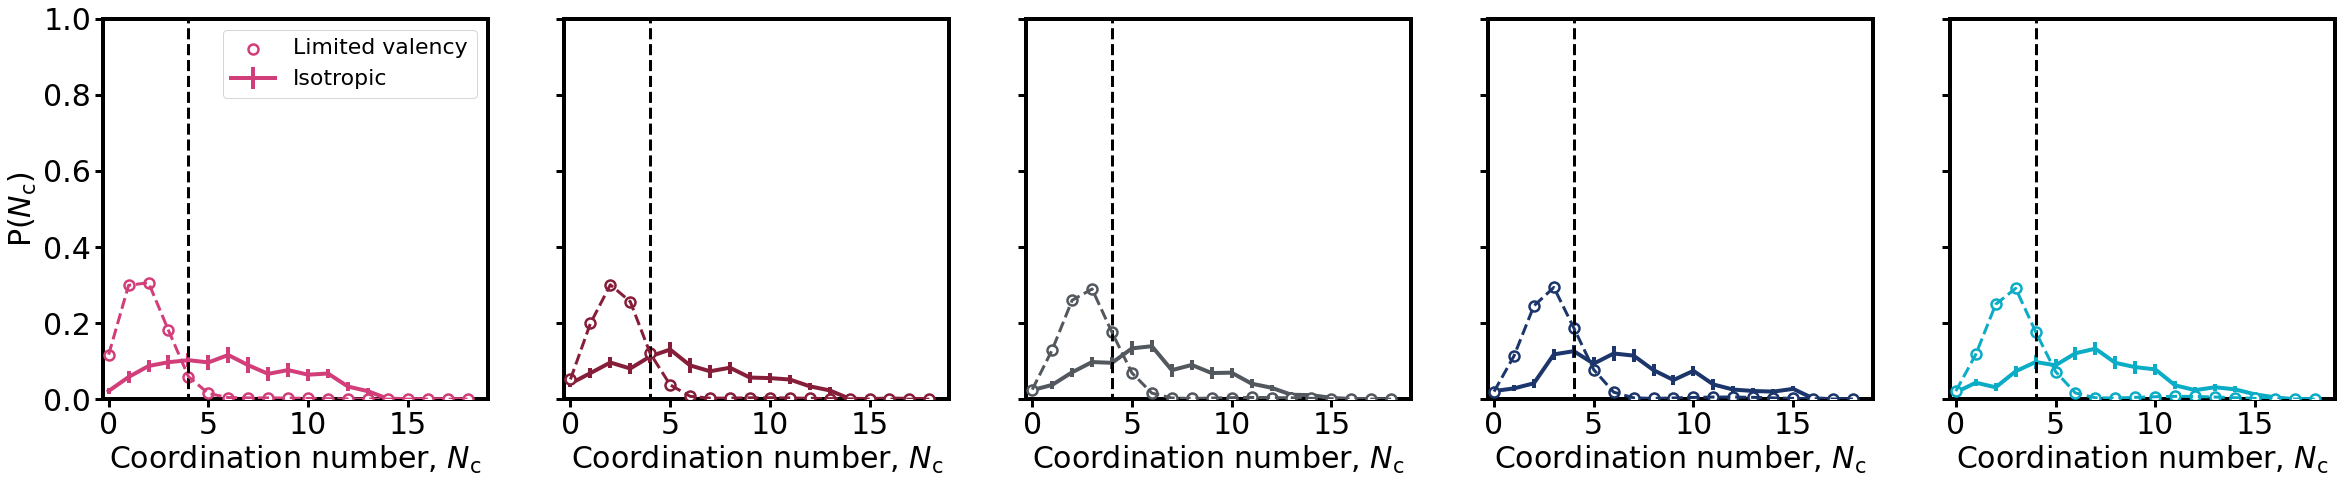

In [24]:
fig, ((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(1,5)
Nc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
axes_all = [ax1,ax2,ax3,ax4,ax5]
colors_all = ['#d23e79', '#861e39', '#53585F', '#1c356a', '#0bacc5']

PNc_all = np.loadtxt('../Data/Fig4_5DE_S6_S7_S10_S11__FractionBound_Nc/tri_alleps_e16_nc_rib.txt')
stdev_PNc_all = np.loadtxt('../Data/Fig4_5DE_S6_S7_S10_S11__FractionBound_Nc/tri_alleps_e16_nc_rib_stdev.txt')
PNc_all_patch = np.loadtxt('../Data/Fig4_5DE_S6_S7_S10_S11__FractionBound_Nc/tri_alleps_e16_nc_rib_patchy.txt')

for i in range(0,len(phi_tot)):
    axes_curr = axes_all[i]
    
    PNc = PNc_all[i,:]
    stdev_PNc = stdev_PNc_all[i,:]
    axes_curr.errorbar(Nc[0:19], PNc, yerr=stdev_PNc, color=colors_all[i], zorder=9, linewidth=4, label='Isotropic')
    axes_curr.plot([4,4],[-100,100], color='k', linestyle='dashed', linewidth=3, zorder=100)

    PNc_patch = PNc_all_patch[i,:]
    axes_curr.scatter(Nc[0:19], PNc_patch[0:19], zorder=10, s=100, marker='o',facecolor='w', edgecolor=colors_all[i], linewidth=2.5, label=r'Limited valency')
    axes_curr.plot(Nc[0:19], PNc_patch[0:19], color=colors_all[i], linestyle='dashed', linewidth=3, zorder=100)

#####

t = ax1.yaxis.get_offset_text()
t.set_size(15)
t = ax1.xaxis.get_offset_text()
t.set_size(15)
ax1.legend(prop={'size': 22},loc='upper right')
for ax in fig.get_axes():
    ax.set_xlim(-0.3,19)
    ax.set_ylim(0,1)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.set_xlabel('Coordination number, $N_\mathrm{c}$',size=30)
    ax.set_ylabel('P($N_\mathrm{c}$)',size=30)
    ax.tick_params(axis='both', labelsize=30,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)

for ax in fig.get_axes():
    ax.label_outer()
        
fig.set_size_inches(40,7)
plt.savefig('./images/FigS11.png', bbox_inches='tight', dpi=300)
